In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import os
from pathlib import Path
import warnings

In [15]:
file_path = r"C:\Users\HP\Documents\Ecommerce_Sales_Prediction_Dataset.csv"

In [16]:
df = pd.read_csv(file_path)
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [30]:
my_path = Path("data")
my_path.mkdir(parents=True, exist_ok=True)

output_file = my_path / "ecommerce_output.csv"
df.to_csv(output_file, index=False)

In [62]:
df = pd.read_csv("data/ecommerce_output.csv")
print(df.head())

         Date Product_Category   Price  Discount Customer_Segment  \
0  01-01-2023           Sports  932.80     35.82       Occasional   
1  02-01-2023             Toys  569.48      3.60          Premium   
2  03-01-2023       Home Decor  699.68      3.56          Premium   
3  04-01-2023             Toys  923.27      0.61          Premium   
4  05-01-2023             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold  
0          6780.38          32  
1          6807.56          16  
2          3793.91          27  
3          9422.75          29  
4          1756.83          17  


## Exploratory Data Analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [63]:
df.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

In [35]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


Convert 'Date' column to datetime

In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'].dtype

dtype('<M8[ns]')

In [44]:
df['year'] = [date.year for date in df['Date']]
df['month'] = [date.month for date in df['Date']]
df['day'] = [date.day for date in df['Date']]

In [45]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Revenue,year,month,day
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,29850.0,2023,1,1
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,9112.0,2023,1,2
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,18891.0,2023,1,3
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,26775.0,2023,1,4
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,12073.0,2023,1,5


In [64]:
df.duplicated().sum()

np.int64(0)

In [65]:
df['Customer_Segment'].unique()

array(['Occasional', 'Premium', 'Regular'], dtype=object)

In [41]:
df['Revenue']=round(df['Price']*df['Units_Sold'])
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Revenue
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,29850.0
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,9112.0
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,18891.0
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,26775.0
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,12073.0
...,...,...,...,...,...,...,...,...
995,2025-09-22,Fashion,740.06,49.06,Regular,1890.83,34,25162.0
996,2025-09-23,Electronics,517.10,28.48,Premium,8011.66,21,10859.0
997,2025-09-24,Electronics,683.43,12.98,Occasional,3408.51,19,12985.0
998,2025-09-25,Sports,51.26,21.85,Occasional,7335.62,26,1333.0


Revenue By Year

In [46]:
df_year = df.groupby('year')['Revenue'].sum()
df_year

year
2023    5475564.0
2024    5552401.0
2025    3974525.0
Name: Revenue, dtype: float64

Data visualization

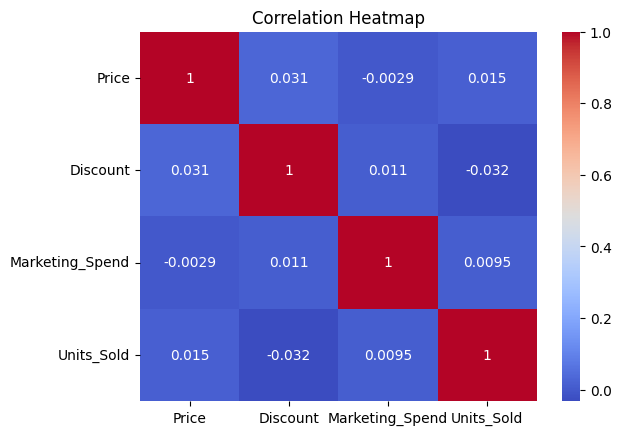

In [66]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

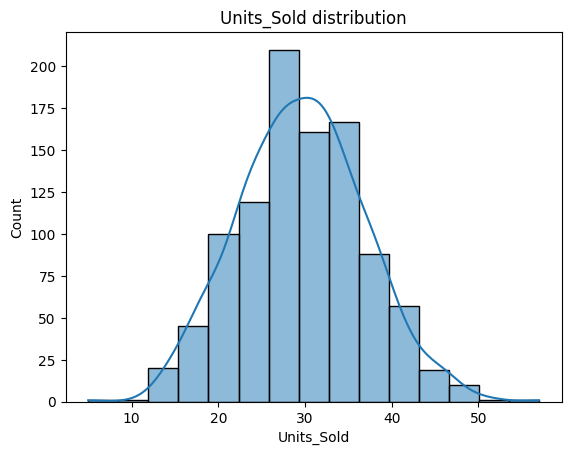

In [60]:
sns.histplot(df['Units_Sold'], bins=15, kde=True)
plt.title("Units_Sold distribution")
plt.show()

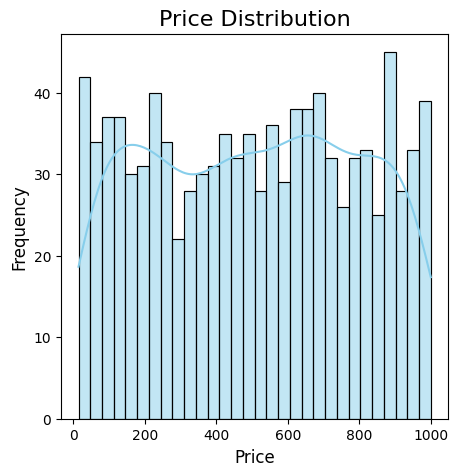

In [67]:
plt.figure(figsize=(5, 5))
sns.histplot(df['Price'], kde=True, bins=30, color='skyblue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

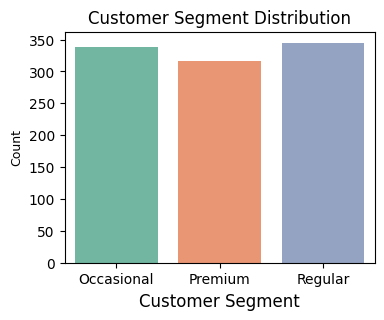

In [73]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Customer_Segment', data=df, palette='Set2')
plt.title('Customer Segment Distribution', fontsize=12)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=9)
plt.show()
warnings.filterwarnings('ignore')